## Extracción de datos bursátiles con `yfinance` y Python 


En este proyecto se realiza una extracción básica de datos bursátiles utilizando la biblioteca yfinance. Se analizan las acciones de Amazon (AMZN) y Apple (AAPL), accediendo a su historial completo de precios, la política de dividendos y el sector económico al que pertenecen. La información se almacena en estructuras tipo DataFrame mediante la biblioteca pandas.


<h2>Contenidos</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Uso de yfinance para extraer información bursátil</li>
        <li>Uso de yfinance para extraer datos históricos del precio de las acciones</li>
        <li>Uso de yfinance para extraer datos históricos de dividendos  </urong></p>
</div>

<hr>


In [1]:
# Instalación de bibliotecas necesarias
!pip install yfinance
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd

### Extracción del precio de una acción
Mediante el uso del método history() se puede obtener el precio histórico de la acción durante un determinado período. El parámetro period permite establecer cuánto tiempo hacia atrás se quiere obtener la información.

Las opciones posibles para period son:
1d (1 día), 5d, 1mo (1 mes), 3mo, 6mo, 1y (1 año), 2y, 5y, 10y, ytd (desde comienzo del año) y max (máximo histórico disponible).


Usando el módulo `Ticker` podemos crear un objeto que nos permitirá acceder a funciones para extraer datos. Para ello, necesitamos proporcionar el símbolo bursátil (ticker) de la acción. En este caso, la empresa es Apple y su símbolo es **AAPL**.


In [6]:
apple = yf.Ticker("AAPL")

In [7]:
data = apple.history(period='1mo')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,0.0,0.0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,0.0,0.0
2025-05-21 00:00:00-04:00,205.169998,207.039993,200.710007,202.089996,59211800,0.0,0.0
2025-05-22 00:00:00-04:00,200.710007,202.750000,199.699997,201.360001,46742400,0.0,0.0
2025-05-23 00:00:00-04:00,193.669998,197.699997,193.460007,195.270004,78432900,0.0,0.0


Se restablece el índice de un DataFrame utilizando la función `reset_index`. Además, al establecer el parámetro `inplace` en True, el cambio se aplica directamente sobre el DataFrame original.

In [9]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,0.0,0.0
1,2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,0.0,0.0
2,2025-05-21 00:00:00-04:00,205.169998,207.039993,200.710007,202.089996,59211800,0.0,0.0
3,2025-05-22 00:00:00-04:00,200.710007,202.750000,199.699997,201.360001,46742400,0.0,0.0
4,2025-05-23 00:00:00-04:00,193.669998,197.699997,193.460007,195.270004,78432900,0.0,0.0


<Axes: xlabel='Date'>

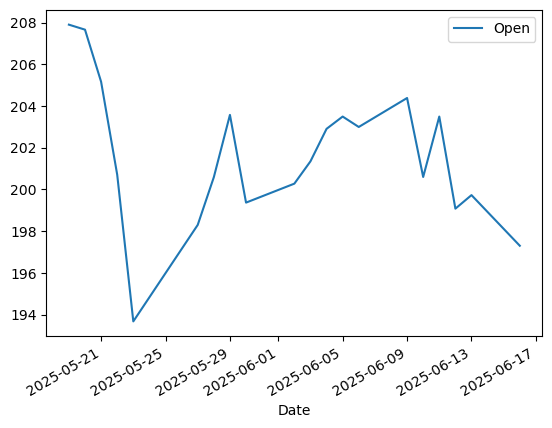

In [10]:
# Se grafica el precio de apertura (Open) en función de la fecha (Date).
data.plot(x='Date', y='Open')

In [13]:
data_max = apple.history(period="max")
data_max.reset_index(inplace=True)
data_max.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091309,0.091738,0.091309,0.091309,73449600,0.0,0.0


<Axes: xlabel='Date'>

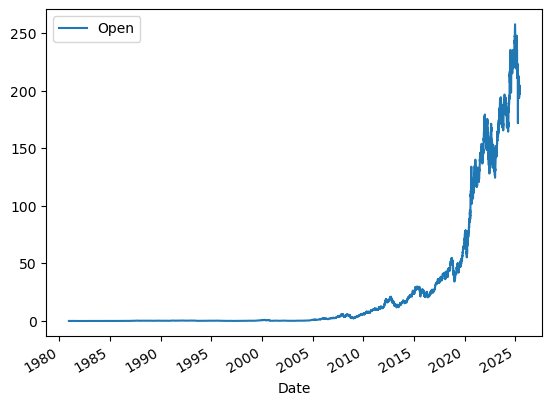

In [14]:
data_max.plot(x='Date', y='Open')

### Extraccion de dividendos

Los dividendos son la distribución de las ganancias de una empresa entre sus accionistas. En este caso, se definen como un monto de dinero devuelto por cada acción que posee un inversor.

Utilizando la variable dividends se puede obtener un DataFrame con los datos de dividendos. El período de tiempo de estos datos está determinado por el valor del parámetro period definido en la función `history()`.


In [15]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64

<Axes: xlabel='Date'>

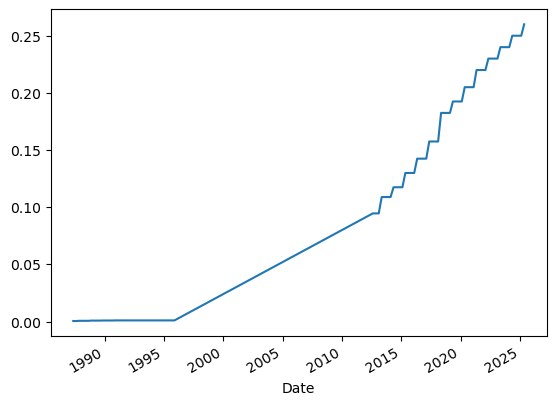

In [16]:
# Graficamos los dividendos a lo largo del timpo
apple.dividends.plot()

## Análisis de acciones de Amazon con yfinance


Se crea el objeto Ticker para Amazon (símbolo bursátil: AMZN)

In [37]:
from yfinance import Ticker
amazon = Ticker("AMZN")

In [27]:
df_amzn = amazon.history(period='1mo')
df_amzn.reset_index(inplace=True)
df_amzn.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-05-19 00:00:00-04:00,201.649994,206.619995,201.259995,206.160004,34314800,0.0,0.0
1,2025-05-20 00:00:00-04:00,204.630005,205.589996,202.649994,204.070007,29470400,0.0,0.0
2,2025-05-21 00:00:00-04:00,201.610001,203.460007,200.059998,201.119995,42460900,0.0,0.0
3,2025-05-22 00:00:00-04:00,201.380005,205.759995,200.160004,203.100006,38938900,0.0,0.0
4,2025-05-23 00:00:00-04:00,198.899994,202.369995,197.850006,200.990005,33393500,0.0,0.0


<Axes: xlabel='Date'>

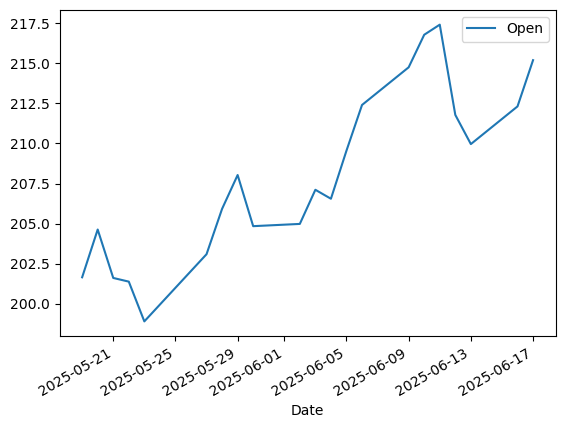

In [28]:
df_amzn.plot(x='Date', y='Open')

In [50]:
df_amzn2 = amazon.history(period='max')
df_amzn2.reset_index(inplace=True)
df_amzn2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [46]:
amazon.dividends

Series([], Name: Dividends, dtype: float64)

In [43]:
# Se utiliza la clave 'sector' para encontrar el sector al que pertenece la acción. 
amazon.info['sector']

'Consumer Cyclical'

Amazon no ha pagado dividendos históricamente y pertenece al sector Consumer Cyclical.

In [48]:
# se accede al volumen negociado en el primer día (primera fila del DataFrame):
df_amzn2.iloc[0]['Volume']

1443120000.0